# Linear Regression Assignment

## Car prices case study of Chinese automobile company Geely Auto

### Problem statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car
 
### Business Goal
 
The business goal is to create a model that is going to be used by the management to understand how exactly the prices vary with the independent variable and which in turn will be a good way for the management to understand the pricing dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 1. Reading and understanding the data

In [2]:
carDetailInfo = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
carDetailInfo.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carDetailInfo.shape

(205, 26)

In [5]:
# Checking various aspects of the data
carDetailInfo.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
carDetailInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
carDetailInfo.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### As we are going to predict the car price so lets see if there is any outliers in the car price.

In [8]:
carDetailInfo['price'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
20%       7385.800000
30%       8022.000000
40%       9036.600000
50%      10295.000000
60%      12515.600000
70%      15458.000000
80%      17493.800000
90%      22563.000000
95%      32472.400000
97%      35490.720000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

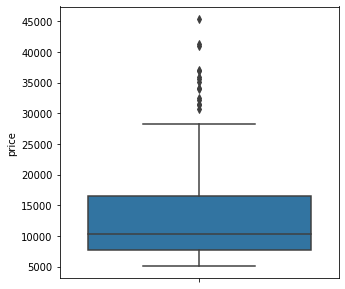

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='price', data=carDetailInfo)
plt.show()

As we can see from above we have outliers in the car price.

In [10]:
carDetailInfo = carDetailInfo[carDetailInfo['price'] <= 35490.72]

### We can drop the car_ID column as it is just a serial number

In [11]:
carDetailInfo.drop(['car_ID'], axis = 1, inplace = True)

### The variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. So we just have to take the car company for our prediction

In [12]:
carDetailInfo['CarName'] = carDetailInfo['CarName'].map(lambda car: car.split(" ", 1)[0])

In [13]:
carDetailInfo['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we can see from above that there are some car names which are redundant and misspelled. So we have to make it correct.

In [14]:
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('vw','volkswagen')
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('vokswagen','volkswagen')
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('toyouta','toyota')
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('Nissan','nissan')
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('porcshce','porsche')
carDetailInfo['CarName'] = carDetailInfo['CarName'].str.replace('maxda','mazda')

In [15]:
carDetailInfo['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let us rename the column CarName to CarCompany

In [16]:
carDetailInfo.rename(columns = {"CarName":"carCompany"}, inplace = True)

## 2. Data Visualization

#### Let's check how the variables are correlated and if there are any highly correlated variables

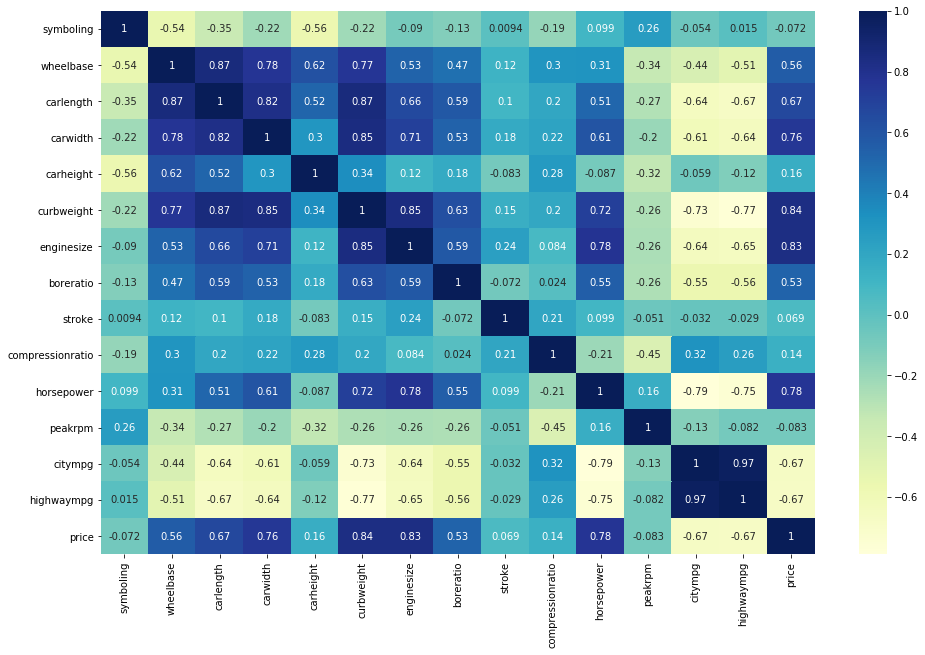

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(carDetailInfo.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heatmap we can seen that
1. carlength and wheelbase has a high correlation of .87

2. carlength and carwidth has a high correlation of .84

3. carlength and curbweight has a high correlation of .88

4. citympg and highwaympg has a high correlation of .97

5. enginesize and horsepower has a high correlation of .81.

So we are going to drop wheelbase, carwidth, curbweight, highwaympg and horsepower from the dataset

In [18]:
droppableColumns = ['carwidth', 'curbweight', 'wheelbase', 'highwaympg', 'horsepower']
carDetailInfo = carDetailInfo.drop(droppableColumns, axis = 1)

In [19]:
carDetailInfo

,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,188.8,55.5,ohc,four,141,mpfi,3.78,3.15,9.5,5400,23,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,188.8,55.5,ohc,four,141,mpfi,3.78,3.15,8.7,5300,19,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,188.8,55.5,ohcv,six,173,mpfi,3.58,2.87,8.8,5500,18,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,188.8,55.5,ohc,six,145,idi,3.01,3.40,23.0,4800,26,22470.0


### Let  us understand the data by putting into plots to see if there are any predictors which have strong association with the target variable

Before moving forward, lets see which variables are numeric variables and which are categorical.

In [20]:
# function to create a new dataset with column name and its data type and variable type whether as float,continuous or int
def getVariableType(carDetailInfo):
    colname=carDetailInfo.columns
    coltype=carDetailInfo.dtypes
    variabletype=[]
    for i in carDetailInfo:
        if (carDetailInfo[i].dtype=='int64' or carDetailInfo[i].dtype=='float64'):
            variabletype.append('Continuous')

        else:
            variabletype.append('Class')
    variabletype
    dict={'ColumnName':colname,
         'Column_dtype':coltype,
          'Variable_Type':variabletype}
    return pd.DataFrame(dict)

In [21]:
getVariableType(carDetailInfo)

,ColumnName,Column_dtype,Variable_Type
symboling,symboling,int64,Continuous
carCompany,carCompany,object,Class
fueltype,fueltype,object,Class
aspiration,aspiration,object,Class
doornumber,doornumber,object,Class
carbody,carbody,object,Class
drivewheel,drivewheel,object,Class
enginelocation,enginelocation,object,Class
carlength,carlength,float64,Continuous
carheight,carheight,float64,Continuous


#### Visualising numeric variables/ Continuous variables using scatter plots

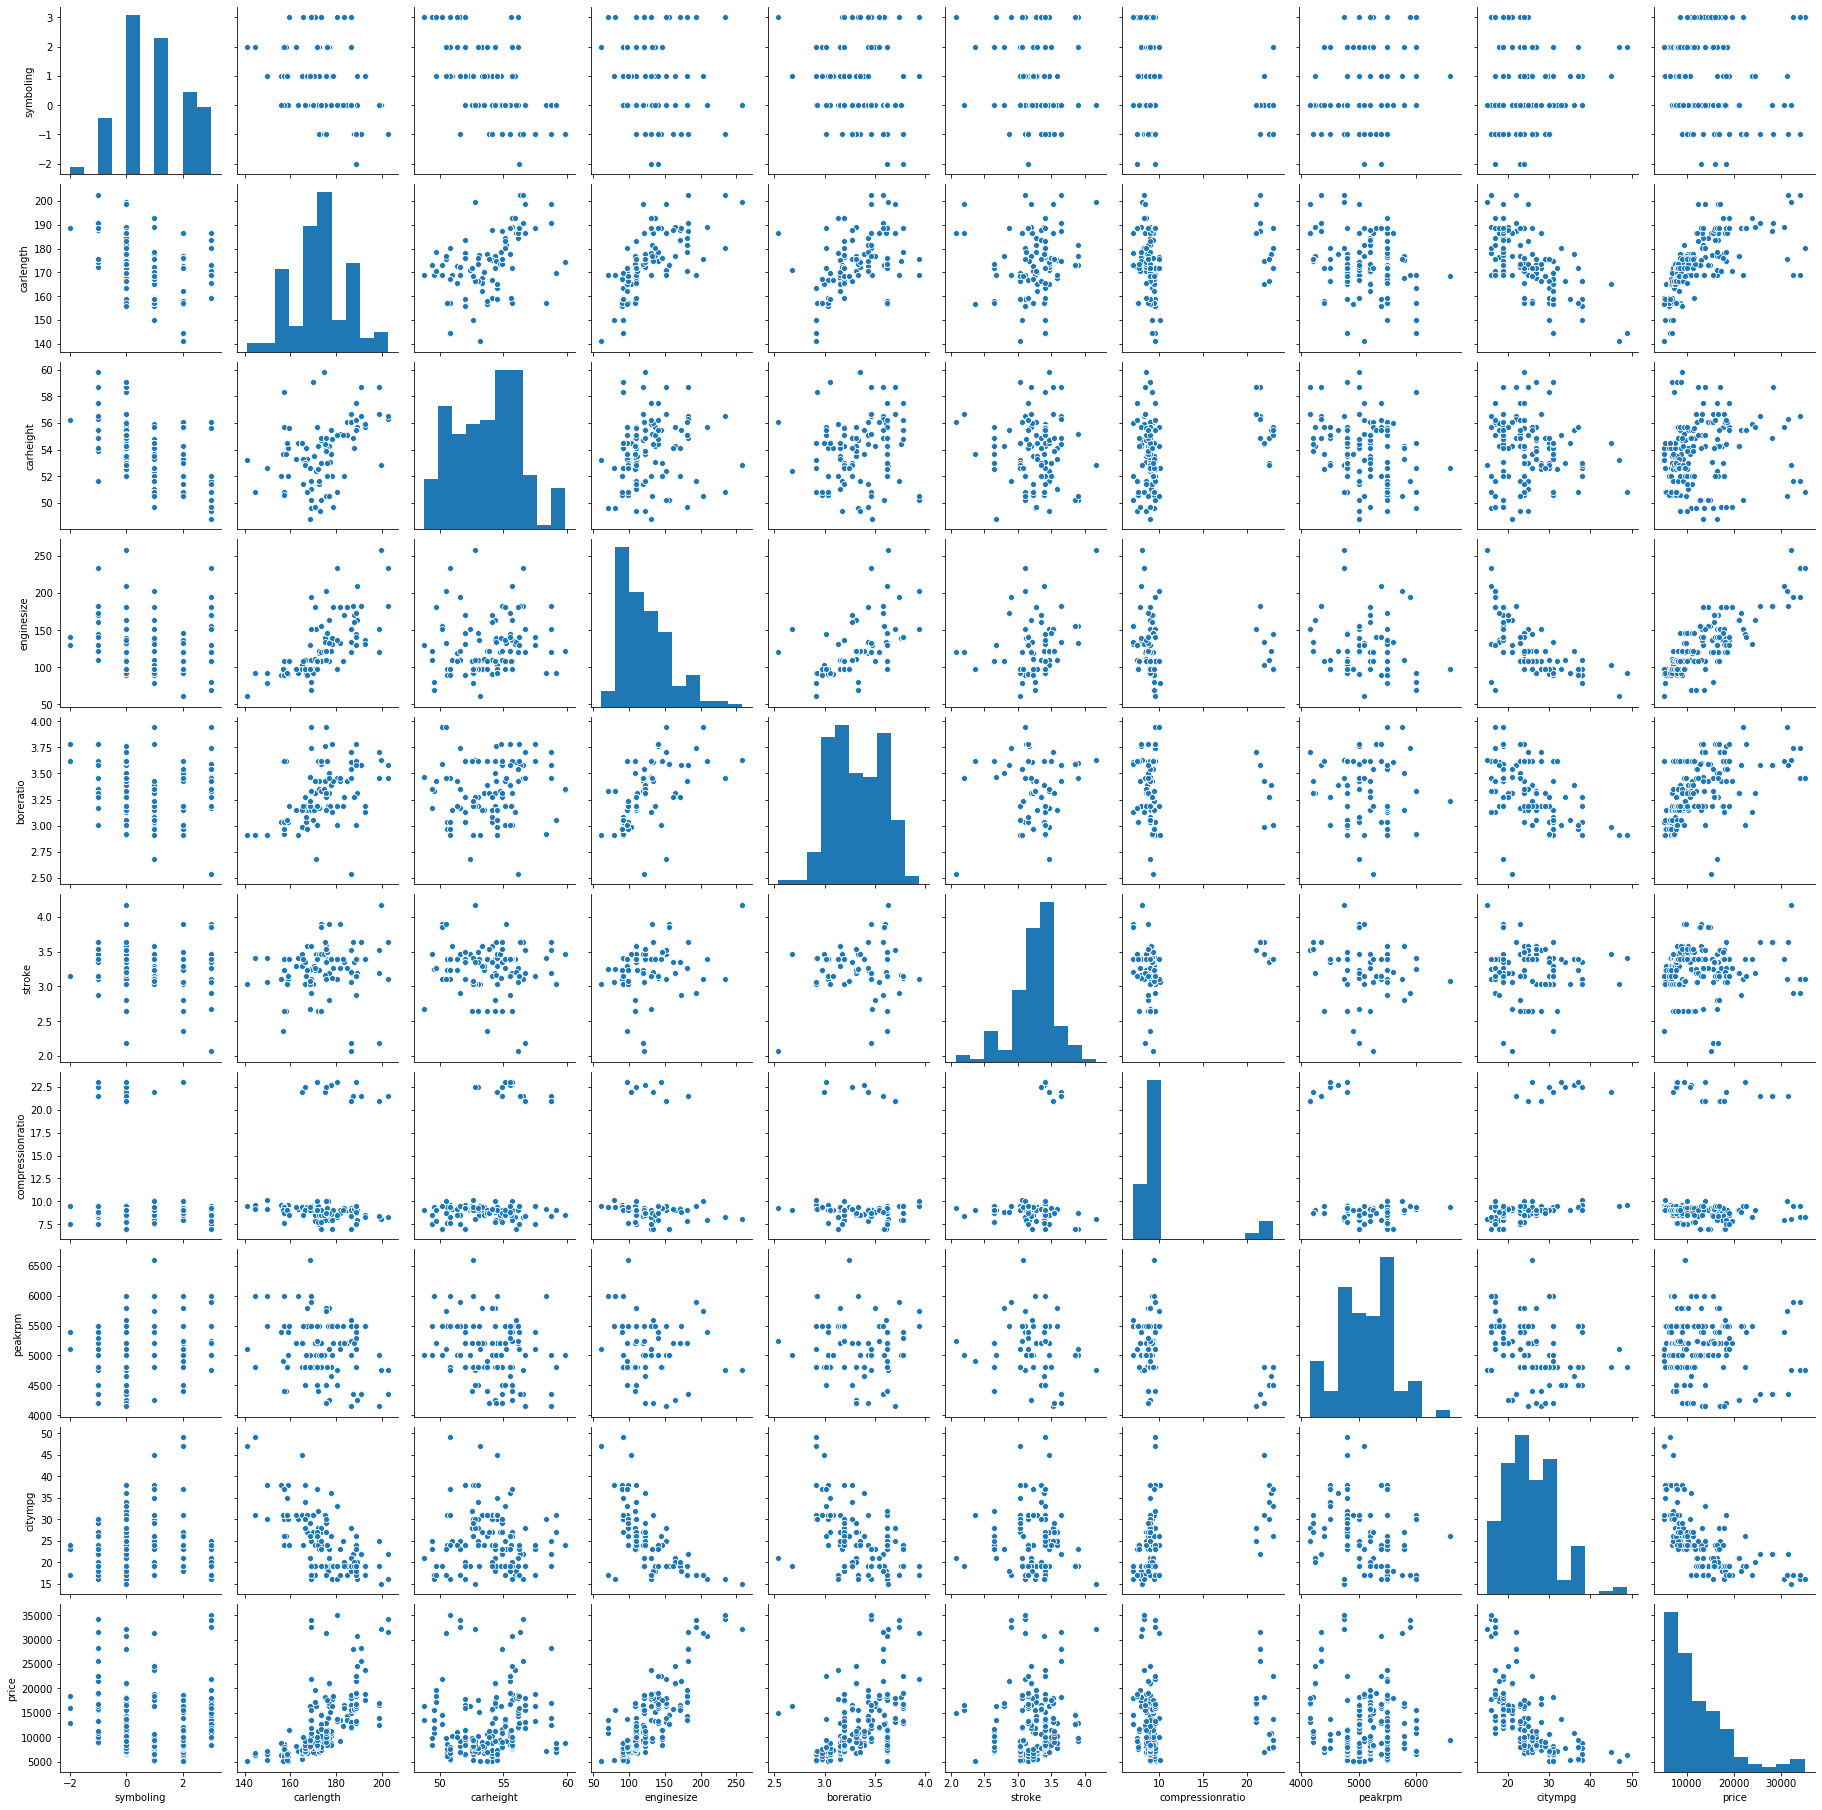

In [22]:
sns.pairplot(carDetailInfo)
plt.show()

#### Visualising numeric categorical variables using box plots


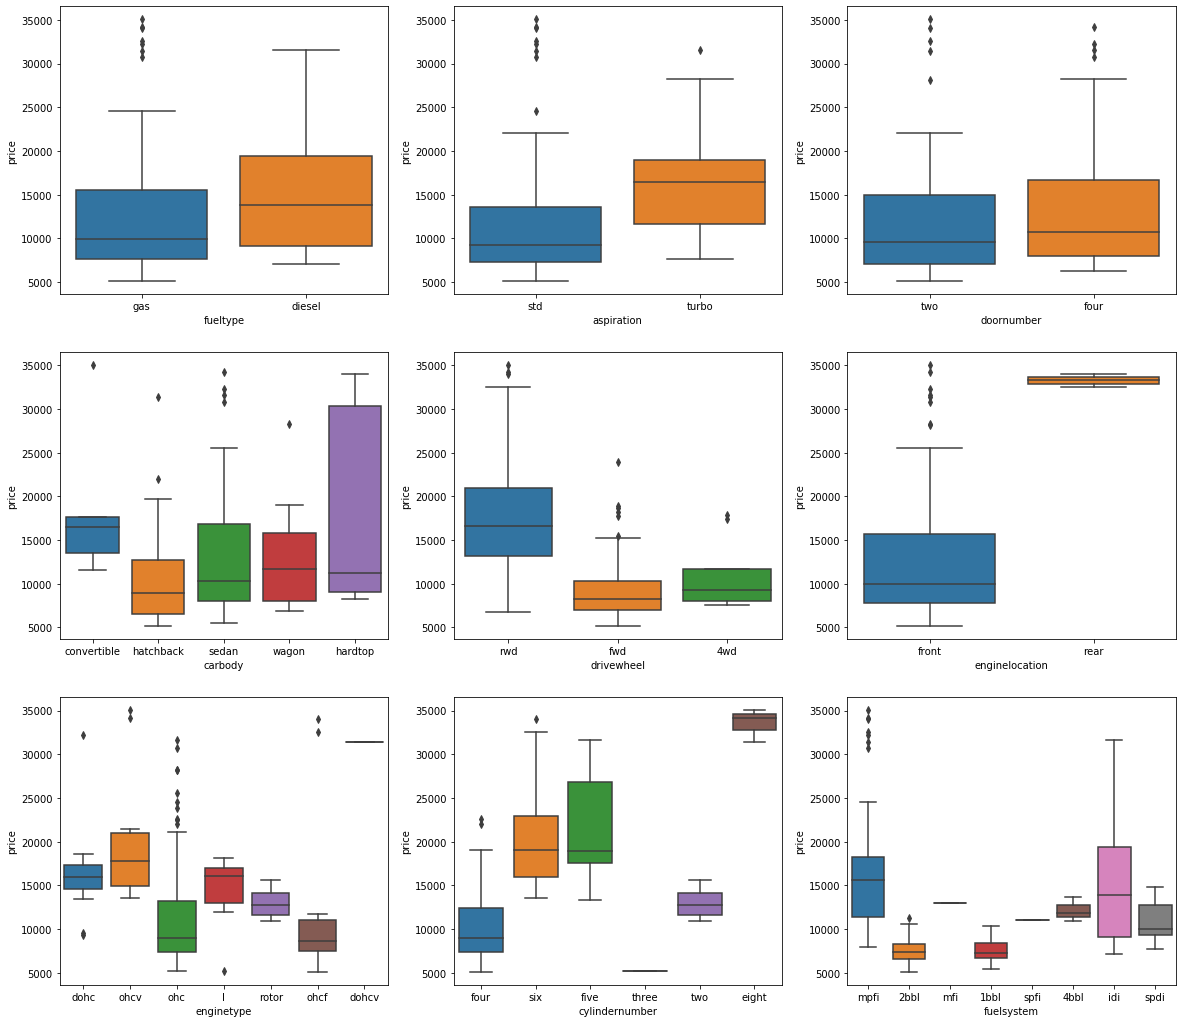

In [23]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carDetailInfo)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carDetailInfo)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carDetailInfo)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = carDetailInfo)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carDetailInfo)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carDetailInfo)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carDetailInfo)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carDetailInfo)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carDetailInfo)
plt.show()

#### Observation
1. Engine Size has a direct impact on the price of the car.

2. Number of cylinders also impacts the price of the car.
   
3. Engine Type also impacts the price of the car
   
4. Engine location has also an impact on the car price




## 3. Data Preparation

To fit a regression line, we would need numerical values and not string. Hence, we need to convert the categorical values to 1s and 0s.

In [24]:
# Defining the function
def convertToNumerical(value):
    return lambda x : 0 if x == value else 1

carDetailInfo['fueltype'] = carDetailInfo['fueltype'].apply(convertToNumerical('gas'))
carDetailInfo['aspiration'] = carDetailInfo['aspiration'].apply(convertToNumerical('std'))
carDetailInfo['doornumber'] = carDetailInfo['doornumber'].apply(convertToNumerical('two'))
carDetailInfo['enginelocation'] = carDetailInfo['enginelocation'].apply(convertToNumerical('front'))


In [25]:
carDetailInfo.head()

,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3,alfa-romero,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,13495.0
1,3,alfa-romero,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,16500.0
2,1,alfa-romero,0,0,0,hatchback,rwd,0,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,19,16500.0
3,2,audi,0,0,1,sedan,fwd,0,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500,24,13950.0
4,2,audi,0,0,1,sedan,4wd,0,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500,18,17450.0


### Dummy Variables

Lets convert the other categorical variables into dummy variables as they have more than two levels.

In [26]:
carDetails = pd.get_dummies(carDetailInfo)
carDetails.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


## 4.Splitting the data into test and training set

In [27]:
# We split the data into 70% and 30% where 70% is for training data and 30% is forr test data
np.random.seed(0)
carDetails_train, carDetails_test = train_test_split(carDetails, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Rescaling of variables is required so that all the variables have a comparable scale and unit of coefficents obtained are of same scale.

We are going to use MinMaxScaler to normalize the variables

In [28]:
scaler = MinMaxScaler()

toBeNormalizedVariables = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

carDetails_train[toBeNormalizedVariables] = scaler.fit_transform(carDetails_train[toBeNormalizedVariables])

In [29]:
carDetails_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
80,1.0,0,1,0,0,0.518699,0.054545,0.248731,0.450000,0.661905,...,0,0,0,0,0,0,0,0,1,0
3,0.8,0,0,1,0,0.577236,0.500000,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
190,1.0,0,0,0,0,0.400000,0.236364,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
28,0.2,0,0,1,0,0.544715,1.000000,0.309645,0.571429,0.661905,...,0,0,0,1,0,0,0,0,0,0
96,0.6,0,0,1,0,0.393496,0.518182,0.182741,0.435714,0.580952,...,0,0,0,1,0,0,0,0,0,0


As we have seen above that correlation between price and enginesize is very high. So we start our model building using these two variabes. Let's first see a scatterplot for `engine` vs `price`.


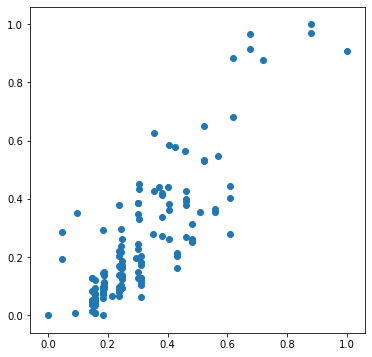

In [30]:
plt.figure(figsize=[6,6])
plt.scatter(carDetails_train.enginesize, carDetails_train.price)
plt.show()

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Running first model with Price and Enginesize

In [31]:
y_train = carDetails_train.pop('price')
X_train = carDetails_train

In [32]:

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [33]:
lr.params

const        -0.088940
enginesize    1.094105
dtype: float64

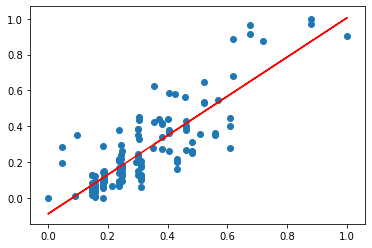

In [34]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.089 + 1.094*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [35]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     348.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.46e-39
Time:                        00:10:30   Log-Likelihood:                 98.994
No. Observations:                 138   AIC:                            -194.0
Df Residuals:                     136   BIC:                            -188.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0889      0.021     -4.288      0.0

#### As we can see that R-squared value is .719 and adjuested R-squared is .717 and also p-value is 0 which signifies that above model is pretty good and also enginesize is a good predictor of car price. But lets consider other predictors as well and build a model. Now as we have many variables, so we are going to use Recursive Feature Elimination(RFE).
(Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class))


In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# create the RFE model and select 15 attributes
rfe = RFE(lm, 15)      
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 50),
 ('fueltype', True, 1),
 ('aspiration', False, 15),
 ('doornumber', False, 32),
 ('enginelocation', True, 1),
 ('carlength', False, 9),
 ('carheight', False, 42),
 ('enginesize', False, 34),
 ('boreratio', False, 17),
 ('stroke', False, 14),
 ('compressionratio', False, 45),
 ('peakrpm', False, 41),
 ('citympg', True, 1),
 ('carCompany_alfa-romero', False, 4),
 ('carCompany_audi', False, 31),
 ('carCompany_bmw', False, 38),
 ('carCompany_buick', False, 3),
 ('carCompany_chevrolet', False, 12),
 ('carCompany_dodge', True, 1),
 ('carCompany_honda', False, 37),
 ('carCompany_isuzu', False, 36),
 ('carCompany_jaguar', True, 1),
 ('carCompany_mazda', True, 1),
 ('carCompany_mercury', False, 49),
 ('carCompany_mitsubishi', True, 1),
 ('carCompany_nissan', False, 2),
 ('carCompany_peugeot', True, 1),
 ('carCompany_plymouth', True, 1),
 ('carCompany_porsche', False, 8),
 ('carCompany_renault', False, 48),
 ('carCompany_saab', False, 29),
 ('carCompany_subaru', True, 

Let us see which columns can be dropped and which columns can be used based on the rfe.support_, rfe.ranking_. The estimated best features are ranked 1.

In [38]:
columnsToBeUsed = X_train.columns[rfe.support_]
columnsToBeUsed

Index(['fueltype', 'enginelocation', 'citympg', 'carCompany_dodge',
       'carCompany_jaguar', 'carCompany_mazda', 'carCompany_mitsubishi',
       'carCompany_peugeot', 'carCompany_plymouth', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'cylindernumber_eight',
       'fuelsystem_1bbl', 'fuelsystem_spfi'],
      dtype='object')

In [39]:
columnsNotToBeUsed = X_train.columns[~rfe.support_]
columnsNotToBeUsed

Index(['symboling', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'carCompany_alfa-romero', 'carCompany_audi', 'carCompany_bmw',
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_mercury', 'carCompany_nissan',
       'carCompany_porsche', 'carCompany_renault', 'carCompany_saab',
       'carCompany_volvo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
     

### Running second model with rfe [columnsToBeUsed variables]

In [40]:
X_train_rfe = X_train[columnsToBeUsed]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     67.79
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.02e-51
Time:                        00:10:30   Log-Likelihood:                 165.47
No. Observations:                 138   AIC:                            -298.9
Df Residuals:                     122   BIC:                            -252.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [41]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,citympg,2.64
0,fueltype,1.45
10,carCompany_toyota,1.29
11,carCompany_volkswagen,1.21
3,carCompany_dodge,1.20
7,carCompany_peugeot,1.19
13,fuelsystem_1bbl,1.19
5,carCompany_mazda,1.17
6,carCompany_mitsubishi,1.14
9,carCompany_subaru,1.13


#### From above we can see that R-squared value has increased to 0.893 and adjusted R square has increaed to 0.880. Also the P value of the variables < .05 except fuelsystem_spfi which is 0.098.As we are going to give precedence to p value over VIF which is 1.02 for fuelsystem_spfi(within norms of < 5). So we are going to drop fuelsystem_spfi from the training set.  

### Running Third model After dropping fuelsystem_spfi

In [42]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_train_rfe.drop(['fuelsystem_spfi'], axis = 1, inplace = True)

In [43]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     71.40
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.60e-52
Time:                        00:10:30   Log-Likelihood:                 163.92
No. Observations:                 138   AIC:                            -297.8
Df Residuals:                     123   BIC:                            -253.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,citympg,2.61
0,fueltype,1.45
10,carCompany_toyota,1.28
11,carCompany_volkswagen,1.21
3,carCompany_dodge,1.19
7,carCompany_peugeot,1.19
13,fuelsystem_1bbl,1.19
5,carCompany_mazda,1.17
6,carCompany_mitsubishi,1.14
9,carCompany_subaru,1.13


#### From above we can see that R-squared  and adjusted R square has not changed much after dropping fuelsystem_spfi. Also the P value of the variables < .05. 

### 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [45]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

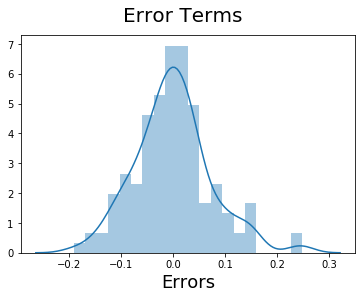

In [46]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

### 6: Prediction
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions.

Let us apply scaling on the test data

In [47]:
toBeNormalizedVariables = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

carDetails_test[toBeNormalizedVariables] = scaler.fit_transform(carDetails_test[toBeNormalizedVariables])

In [48]:
carDetails_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.0
mean,0.553333,0.116667,0.183333,0.550000,0.0,0.537385,0.487879,0.382974,0.515709,0.517130,...,0.0,0.016667,0.066667,0.266667,0.016667,0.116667,0.0,0.483333,0.050000,0.0
std,0.263912,0.323732,0.390205,0.501692,0.0,0.222319,0.240126,0.210704,0.293104,0.218960,...,0.0,0.129099,0.251549,0.445948,0.129099,0.323732,0.0,0.503939,0.219784,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.0,0.399632,0.323232,0.201439,0.316092,0.404762,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.0,0.524862,0.494949,0.366906,0.494253,0.515873,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.800000,0.000000,0.000000,1.000000,0.0,0.736648,0.681818,0.505396,0.787356,0.650794,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


#### Divide the data in to X_test and y_test

In [49]:
y_test = carDetails_test.pop('price')
X_test = carDetails_test

In [50]:
X_test.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'carCompany_alfa-romero',
       'carCompany_audi', 'carCompany_bmw', 'carCompany_buick',
       'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugeot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_

In [51]:
X_train_rfe.columns

Index(['const', 'fueltype', 'enginelocation', 'citympg', 'carCompany_dodge',
       'carCompany_jaguar', 'carCompany_mazda', 'carCompany_mitsubishi',
       'carCompany_peugeot', 'carCompany_plymouth', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'cylindernumber_eight',
       'fuelsystem_1bbl'],
      dtype='object')

In [52]:
# Creating a new test column with variables that are present in train set
x_test_temp =  X_train_rfe
x_test_temp.drop(['const'], axis = 1, inplace = True)
X_test_new = X_test[x_test_temp.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


#### Let us predict now

In [53]:
y_pred = lm.predict(X_test_new)

### 7: Model evaluation

Text(0, 0.5, 'y_pred')

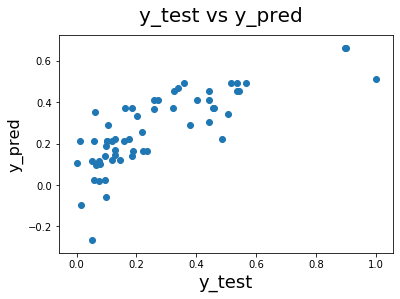

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0.5, 0, 'Errors')

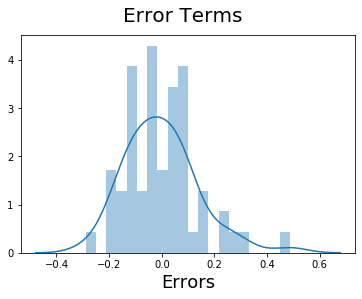

In [55]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

In [56]:
# R2 score for test data
r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2

0.6215913020931653

### Observation: From above we can see that the model worked well with the training data with R-square value of 0.890 but it did not work quite well with test data where r-square drops down to .62.

#### Let us create a new model and remoce first the carCompany variable as this variable has a big impact on the pricing of the car but for our prediction we need to focus on the features that can be considered in determining the price of a car.

### 8.Fourth Model (Alternate model)

In [57]:
carDetailInfo_model4 = carDetailInfo.drop(['carCompany'], axis = 1)
carDetailInfo_model4.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,13495.0
1,3,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,16500.0
2,1,0,0,0,hatchback,rwd,0,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,19,16500.0
3,2,0,0,1,sedan,fwd,0,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500,24,13950.0
4,2,0,0,1,sedan,4wd,0,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500,18,17450.0


### Dummy variables

Lets convert the other categorical variables into dummy variables as they have more than two levels.

In [58]:
carDetailInfo_model4 = pd.get_dummies(carDetailInfo_model4)
carDetailInfo_model4.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


### 9.Splitting into training and test data

In [59]:
# We split the data into 70% and 30% where 70% is for training data and 30% is forr test data
np.random.seed(0)
carDetailInfo_model4_train, carDetailInfo_model4_test = train_test_split(carDetailInfo_model4, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescalling the feature

In [60]:
scaler = MinMaxScaler()

toBeNormalizedVariables = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

carDetailInfo_model4_train[toBeNormalizedVariables] = scaler.fit_transform(carDetailInfo_model4_train[toBeNormalizedVariables])

In [61]:
carDetailInfo_model4_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.575362,0.094203,0.188406,0.572464,0.014493,0.521174,0.452635,0.308835,0.542495,0.555193,...,0.007246,0.021739,0.050725,0.362319,0.014493,0.094203,0.007246,0.420290,0.043478,0.007246
std,0.244595,0.293175,0.392460,0.496523,0.119946,0.189651,0.223075,0.173386,0.193349,0.153188,...,0.085126,0.146362,0.220234,0.482421,0.119946,0.293175,0.085126,0.495404,0.204674,0.085126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.409756,0.290909,0.182741,0.364286,0.495238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.515447,0.481818,0.248731,0.521429,0.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.601626,0.609091,0.406091,0.707143,0.633333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_train = carDetailInfo_model4_train.pop('price')
X_train = carDetailInfo_model4_train

Now as we have many variables, so we are going to use Recursive Feature Elimination(RFE).

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# create the RFE model and select 15 attributes
rfe = RFE(lm, 15)      
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 13),
 ('fueltype', False, 16),
 ('aspiration', True, 1),
 ('doornumber', False, 14),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 19),
 ('enginesize', True, 1),
 ('boreratio', False, 22),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('carbody_convertible', False, 5),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 24),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 25),
 ('drivewheel_4wd', False, 18),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 6),
 ('enginetype_dohc', False, 23),
 ('enginetype_dohcv', False, 15),
 ('enginetype_l', False, 27),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 28),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 9),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_three', True,

In [65]:
columnsToBeUsed = X_train.columns[rfe.support_]
columnsToBeUsed

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'carbody_hardtop',
       'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_mpfi'],
      dtype='object')

In [66]:
columnsNotToBeUsed = X_train.columns[~rfe.support_]
columnsNotToBeUsed

Index(['symboling', 'fueltype', 'doornumber', 'carheight', 'boreratio',
       'carbody_convertible', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [67]:
# Creating training dataframe with RFE selected variables
X_train_rfe = X_train[columnsToBeUsed]

### Running fourth model with rfe [columnsToBeUsed variables]

In [68]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [69]:
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     84.74
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.94e-56
Time:                        00:10:31   Log-Likelihood:                 174.54
No. Observations:                 138   AIC:                            -319.1
Df Residuals:                     123   BIC:                            -275.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1076 

In [70]:
# Let us check VIF as well
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,enginetype_rotor,inf
13,cylindernumber_two,inf
4,stroke,34.34
3,enginesize,24.34
2,carlength,17.87
6,peakrpm,10.99
7,citympg,9.32
9,enginetype_ohc,6.92
14,fuelsystem_mpfi,4.24
1,enginelocation,3.84


### Observation: 
From above we can see that R-squared value is 0.906 and Adj-Rsquared is 0.895. However the P value of citympg is 0.113 and also its VIF is 7.90 which is way high. SO lets drop this variable and build a new model

In [71]:
X_train_rfe.drop(['citympg'], axis = 1, inplace = True)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     89.95
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.41e-56
Time:                        00:10:31   Log-Likelihood:                 173.13
No. Observations:                 138   AIC:                            -318.3
Df Residuals:                     124   BIC:                            -277.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1948 

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
12,cylindernumber_two,inf
4,stroke,32.80
3,enginesize,23.13
2,carlength,17.60
6,peakrpm,9.10
8,enginetype_ohc,6.57
13,fuelsystem_mpfi,3.85
1,enginelocation,3.83
7,carbody_hardtop,3.17


### Observation: 
From above we can see that R-squared value is 0.904 and Adj-Rsquared is 0.894 which has not changed much. However the P value of carbody_hardtop is 0.054 and also its VIF is 3.10. So, lets drop this variable and build a new model

In [73]:
X_train_rfe.drop(['carbody_hardtop'], axis = 1, inplace = True)

In [74]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     95.00
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.03e-57
Time:                        00:10:31   Log-Likelihood:                 171.05
No. Observations:                 138   AIC:                            -316.1
Df Residuals:                     125   BIC:                            -278.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1958 

### Observation: 
From above we can see that R-squared value is 0.901 and Adj-Rsquared is 0.892 which has not changed much.Also all the  P values of all the variables are less than .05. So, lets see if we can build a model by looking into the VIF of variables and see if some variables ca be dropped.

In [75]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
4,stroke,32.58
3,enginesize,23.13
2,carlength,17.55
6,peakrpm,8.91
7,enginetype_ohc,6.55
12,fuelsystem_mpfi,3.76
5,compressionratio,2.66
9,cylindernumber_eight,1.66


### Observation: 
From above we can see that VIF of enginetype_rotor is very high. So lets drop this variable

In [76]:
X_train_rfe.drop(['enginetype_rotor'], axis = 1, inplace = True)

In [77]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     95.00
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.03e-57
Time:                        00:10:31   Log-Likelihood:                 171.05
No. Observations:                 138   AIC:                            -316.1
Df Residuals:                     125   BIC:                            -278.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1958 

In [78]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,stroke,32.58
3,enginesize,23.13
2,carlength,17.55
6,peakrpm,8.91
7,enginetype_ohc,6.55
11,fuelsystem_mpfi,3.76
5,compressionratio,2.66
8,cylindernumber_eight,1.66
1,enginelocation,1.65
0,aspiration,1.58


### Observation: 
From above we can see that rsquared and adj-rsquared has not changed much. But when we check vif we can see that Stroke has a very high vif of 32.58 along with enginesize, carlength,peakrpm and enginetype_ohc. But as per rule we are going to drop one variable at a time and see how it reflects on other variables. So first lets drop stroke.

In [79]:
X_train_rfe.drop(['stroke'], axis = 1, inplace = True)

In [80]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     86.62
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.95e-53
Time:                        00:10:31   Log-Likelihood:                 159.51
No. Observations:                 138   AIC:                            -295.0
Df Residuals:                     126   BIC:                            -259.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2344 

In [81]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,17.53
3,enginesize,13.05
5,peakrpm,5.74
6,enginetype_ohc,4.04
10,fuelsystem_mpfi,3.26
4,compressionratio,2.48
0,aspiration,1.52
7,cylindernumber_eight,1.48
1,enginelocation,1.42
9,cylindernumber_two,1.32


### Observation: 
From above we can see that adj-rsquared has come down to 0.873. However p value of peakrpm has increased on .419 and its VIf is also greater than 5. So let us drop peakrpm

In [82]:
X_train_rfe.drop(['peakrpm'], axis = 1, inplace = True)

In [83]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     95.48
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.06e-54
Time:                        00:10:31   Log-Likelihood:                 159.15
No. Observations:                 138   AIC:                            -296.3
Df Residuals:                     127   BIC:                            -264.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2134 

#### Now we can see that r-squared is 0.883 and adj_rsuqred is .873. And also p values of all the variables are < .05. Now lets see the VIF of all the variables

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,15.95
3,enginesize,12.77
9,fuelsystem_mpfi,2.97
5,enginetype_ohc,2.52
4,compressionratio,2.36
0,aspiration,1.52
6,cylindernumber_eight,1.46
1,enginelocation,1.28
8,cylindernumber_two,1.13
7,cylindernumber_three,1.00


### Observation: 
From above we can see VIF of carlength is 15.95 which is greater than 5. So lets drop this variable

In [85]:
X_train_rfe.drop(['carlength'], axis = 1, inplace = True)

In [86]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     91.06
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.83e-51
Time:                        00:10:31   Log-Likelihood:                 149.47
No. Observations:                 138   AIC:                            -278.9
Df Residuals:                     128   BIC:                            -249.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1440 

### Observation: 
From above we can see R-squared and Adj-squared are good but the p value of  of cylindernumber_three  is .169 which is greater than .05. So lets drop this variable

In [87]:
X_train_rfe.drop(['cylindernumber_three'], axis = 1, inplace = True)

In [88]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     101.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.95e-52
Time:                        00:10:31   Log-Likelihood:                 148.45
No. Observations:                 138   AIC:                            -278.9
Df Residuals:                     129   BIC:                            -252.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1335 

### Observation: 
From above we can see R-squared is .863 and Adj-squared is .854 which is good but the p value of  of enginetype_ohc  is .065 which is greater than .05. So lets drop this variable

In [89]:
X_train_rfe.drop(['enginetype_ohc'], axis = 1, inplace = True)

In [90]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.44e-52
Time:                        00:10:31   Log-Likelihood:                 146.61
No. Observations:                 138   AIC:                            -277.2
Df Residuals:                     130   BIC:                            -253.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0986 

### Observation: 
From above we can see R-squared is .859 and Adj-squared is .852 which is good and P value of all the variables are <.05. Now lets check if VIF of all the variables are less than 5.

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.29
6,fuelsystem_mpfi,2.55
3,compressionratio,2.02
0,aspiration,1.50
4,cylindernumber_eight,1.23
1,enginelocation,1.09
5,cylindernumber_two,1.02


### Observation: 
From above we can VIF of all the variables are also less than 5. 

So, Now we can say we have a model where all the features are significant and there is not much high collinearity (VIF <5).

### 10: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [92]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

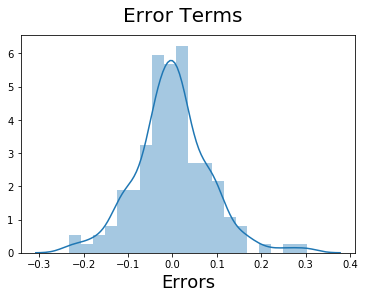

In [93]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Observation: 
Errors are normally disctributed.

### 11. Prediction:
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions.

Let us apply scaling on the test data

In [94]:
toBeNormalizedVariables = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

carDetailInfo_model4_test[toBeNormalizedVariables] = scaler.fit_transform(carDetailInfo_model4_test[toBeNormalizedVariables])

#### Dividing the data into X_test and y_test

In [95]:
y_test = carDetailInfo_model4_test.pop('price')
X_test = carDetailInfo_model4_test

In [96]:
# Creating a new test column with variables that are present in train set
x_test_temp =  X_train_rfe
x_test_temp.drop(['const'], axis = 1, inplace = True)
X_test_new = X_test[x_test_temp.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [97]:
y_pred = lm.predict(X_test_new)

### 12. Model Evaluation

Text(0, 0.5, 'y_pred')

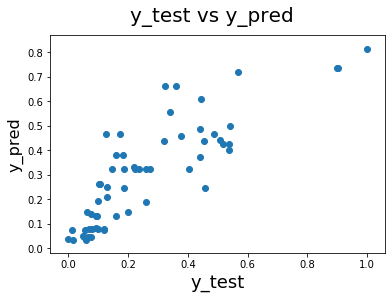

In [98]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)  

Text(0.5, 0, 'Errors')

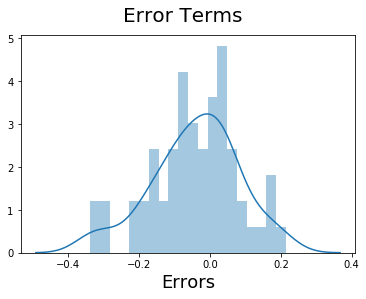

In [99]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

In [100]:
## R value of the test data
r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2

0.6657924908986523

### Observation:
1. The prediction of model in the training data set is quite well however it cannot be said incase of test dataset as the r-square value drops to .66
2. The first model performs better on the training data with 0.890 r-squared value where as the second model performs better on the test data than the first model with .66 r-squared value.
3. In case of the first model the carCompany was the major variable in predicting the car price and it did not take account the enginesize which is a more important variable into its account.

# Recommendations for the Chinese automobile company Geely Auto
I would recommend the second model to predict the price of the car. And the variables to be considered are as below:

1.Engine Size

2.Fuel System

3.Compression Ratio

4.Aspiration

5.Number of Cylinders

6.Engine Location

